### Equipo 3
Grupo 02- Miércoles 6:00-9:00

**Integrantes:**

1986209 Dávila Martínez Ana Saraí

1870354 Martínez Acosta Milton Aldair

1583211 Rodríguez Pacheco Jesús Mauricio

### Título de la base de datos.
+ ***Nombre con el que se encuentra en la página:*** 
 *Pima Indians Diabetes Database*

+ ***Url de la página:***
https://www.kaggle.com/uciml/pima-indians-diabetes-database

![Image](https://img.freepik.com/vector-gratis/concepto-diabetes-personaje-medico-dibujos-animados-que-aconseja-pequenas-personas-pacientes-estilo-vida-saludable-blanco_109722-1158.jpg?size=626&ext=jpg)

**Tipo de datos:**
Son tablas que muestran variables que representan factores de riesgo para la diabetes, así como otros indicadores como nivel de glucosa, insulina, presión sanguínea, edad, entre otros. 

**Las columnas que contiene la base de datos son las siguientes:**
+ **Pregnacies:** Número de veces que se ha embarazado.
+ **Glucose:** Concentración de glucosa en plasma a 2 horas en una prueba de tolerancia a la glucosa oral.
+ **BloodPressure:** Presión arterial diastólica medida en mmHg.
+ **SkinThickness:** Grosor del pliegue de la piel, medido en mm.
+ **Insulin:** nivel de insulina sérica de 2 horas, medida en µU/mL.
+ **BMI:** Índice de masa corporal, medido en kg/m².
+ **DiabetesPedigreeFunction:** Medida de la influencia genética esperada de los familiares afectados y no afectados sobre el riesgo de diabetes en el sujeto.
+ **Age:** Edad en años.
+ **Outcome:** Variable de clase, que indica si tiene diabetes o no.

### Justificación del uso de datos.

En 2017, se registraron 703 mil 047 defunciones en México, de las cuales el 15.2% fueron atribuidas a la diabetes, es decir, es la segunda causa de muerte que se presenta con mayor frecuencia en los mexicanos, adicionalmente, la diabetes contribuye de manera importante a otras enfermedades como las cardiovasculares, renales, retinopatías, etc. lo que aumenta su peligro de forma alarmante.  

Otro dato para destacar es que México cuenta con la mayor tasa de sobrepeso y obesidad entre su población, en comparación con otros países de América latina, si a esto añadimos que el exceso de peso es un factor de riesgo para la prediabetes y diabetes tipo 2 es notable que esta enfermedad es muy relevante en el contexto de nuestro país. Los datos expuestos anteriormente nos motivaron a desarrollar un método que ayude a agilizar el diagnóstico de diabetes.

Consideramos que es importante el desarrollo de nuevos métodos para la predicción de enfermedades tan dañinas como la diabetes, por lo que elegimos esta base de datos para poder enfrentar un problema sanitario que afecta a miles de personas en nuestro país.

### Objetivo principal: 
Crear un modelo de predicción para analizar si una persona tiene diabetes o no, basado en técnicas de minería de datos, dicho modelo se fundamentará en las variables que sean más significativas en el diagnóstico de diabetes mellitus. 
#### Objetivos secundarios: 
+ Visualizar la distribución de los datos.
+ Establecer qué tan correlacionadas están ciertas variables como por ejemplo, la insulina y la glucosa.
+ Graficar los resultados obtenidos, para tener un mejor entendimiento del modelo.
+ Entender si existe una razón médica para tener el valor de 0 en las columnas que lo presenten.

#### Preguntas de interés:
+ ¿Podríamos afirmar que la diabetes predomina en el grupo del pueblo Pima?
+ ¿Qué variables, que representan un factor de riesgo para la diabetes están altamente correlacionadas?
+ ¿El modelo tiene un grado de predicción alto?


---

## Pre-procesamiento de datos. 

### Importar librerías y base de datos.

In [1]:
import pandas as pd
import numpy as np
import json
import graphviz

También existen otras librerias como Matplotlib, SciPy, Numba, Keras,etc

### Visualizar los datos.

La base de datos usada es *Pima Indians Diabetes Database*, obtenida del *National Institute of Diabetes and Digestive and Kidney Diseases*
Y como está en formato .csv, se importará de la siguiente manera

In [2]:
diab = pd.read_csv("diabetes.csv")

**.shape**

Devuelve una tupla con las dimensiones de un array, es decir, nos proporciona el número de columnas y filas de la base de datos, en este caso se puede observar que tiene 9 columnas y 768 filas.

In [3]:
diab.shape

(768, 9)

+ **head()**

Con el comando de head se pueden visualizar los primeros cinco elementos de cada una de las columnas;
si se desean ver más datos dentro del paréntesis se escribe el número de elementos que queremos mostrar.

In [4]:
diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Ejemplo:**

In [5]:
diab.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


+ **tail()**

Esta función devuelve las últimas n filas del objeto según la posición. Es útil para verificar datos rápidamente, por ejemplo, después de ordenar o agregar filas,en este caso se puede observar que se tienen datos de 767 pacientes.

In [6]:
diab.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


### Descripción básica de columnas

+ **columns()**

Nos interesa saber que columnas tiene la base de dato, para establecer que variables podrían ser de utilidad para el modelo,entonces se usa ***.columns***

In [7]:
diab.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

+ **Celdas vacias**

In [8]:
diab.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

### Clasificación de los datos

+ **dtypes**

La propiedad dtypes se usa para encontrar los dtypes en el DataFrame.

Esto devuelve una serie con el tipo de datos de cada columna. El índice del resultado son las columnas del DataFrame original. 
En este caso, nos interesa saber que tipo de variable es, para dar el tratamiento estadístico correspondiente.

In [9]:
diab.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

> Y si se desea conocer el tipo de datos que contiene alguna columna en específico, se usa:

In [10]:
diab['SkinThickness'].dtype

dtype('int64')

### Cambiar nombres de columnas.

Se cambiará el nombre de las columnas, para una fácil identificación de éstas.

In [11]:
diab.rename(columns = {'Pregnancies':'Emb','BloodPressure':'B_P','Glucose':'Glu','SkinThickness':'S_T','Insulin':'In','DiabetesPedigreeFunction':'DPF','Outcome':'Result'})

,Emb,Glu,B_P,S_T,In,BMI,DPF,Age,Result
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Guardar otros archivos con agrupaciones.

Nos interesa saber que tanto afecta el embarazo, por lo que hacemos una agrupación para las mujeres que han estado embarazadas.

In [12]:
diabEm=diab[diab.Pregnancies > 0]
diabEm

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Para guardar la base de datos modificada, se usa la siguiente sintaxis:

In [13]:
diabEm.to_csv('MujeresEmbarazo.csv')

La diabetes gestacional tiene el factor de riesgo de la edad, ya que el riesgo se incrementa para mujeres mayores a 25 años, por lo que nos interesa dividir la base de datos en dos grupos:
+ *Menores de 25 años*

In [14]:
dMenos25=diab[diab.Age < 25]
dMenos25

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
27,1,97,66,15,140,23.2,0.487,22,0
32,3,88,58,11,54,24.8,0.267,22,0
47,2,71,70,27,0,28.0,0.586,22,0
49,7,105,0,0,0,0.0,0.305,24,0
...,...,...,...,...,...,...,...,...,...
738,2,99,60,17,160,36.6,0.453,21,0
742,1,109,58,18,116,28.5,0.219,22,0
750,4,136,70,0,0,31.2,1.182,22,1
760,2,88,58,26,16,28.4,0.766,22,0


Para guardar la base de datos modificada, se usa la siguiente sintaxis:

In [15]:
dMenos25.to_csv('DiabetesM25.csv')

+ *Mayores de 25 años*

In [16]:
dMas25=diab[diab.Age > 25]
dMas25

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


Para guardar la base de datos modificada, se usa la siguiente sintaxis:

In [17]:
dMas25.to_csv('DiabMas25.csv')

### Valores que son distintos a cero
Como el valor de ceros se registró en lugar de observaciones experimentales faltantes y además, según investigaciones, se ha demostrado que si se eliminaban los valores con cero, los resultados podría mejorar drásticamente.
> Procederemos a eliminar los valores que sean cero y que no tengan una razón médica que podría explicar esta naturaleza

Primero determinaremos en qué columnas existen valores con cero

Al analizar la variable *Insulin* nos percatamos que no existe razón médica que explique el valor de 0, ya que en un estudio reciente sobre el nivel de insulina mostró que una persona con un índice de masa corporal<24 y sensibilidad normal a la insulina(RGI>6) posee un nivel de insulina sérica  de 8.7 ± 3.2 µU/mL, de 58.27 ± 44.08 y de 50.87 ± 26.10 µU/mL
a los 0, 60 y 120 minutos respectivamente.
Por lo que un valor de 0, no tiene razón médica aparente, por ende se procederá a eliminar las filas que contengan 0.

In [18]:
print(np.count_nonzero(diab.Insulin== 0))

374


In [19]:
OInsul=diab[diab.Insulin > 0]
OInsul

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
753,0,181,88,44,510,43.3,0.222,26,1
755,1,128,88,39,110,36.5,1.057,37,1
760,2,88,58,26,16,28.4,0.766,22,0
763,10,101,76,48,180,32.9,0.171,63,0


Se procederá a buscar valores de 0 en las columnas de la nueva base de datos.

In [20]:
OInsul.to_csv('NoZeroInsul.csv')

In [21]:
NOZero=pd.read_csv("NoZeroInsul.csv")

Los niveles de glusosa normal estando en ayunas, oscilan entre los 70 mg/dL   y 100 mg/dl. Lo que indica que un nivel de glucosa 0 mg/dl, no tendría una razón médica, por lo que se procede a eliminar filas con el valor de 0.

In [22]:
print(np.count_nonzero(NOZero.Glucose== 0))

1


La variable *SkinThickness* mide el grosor del pliegue de la piel, el cual está medido en mm.
Para los adultos, los valores normales estándar para los pliegues cutáneos del tríceps son 25 mm (hombres) o aproximadamente un 20% de grasa; 18,0 mm (mujeres) o aproximadamente un 30% de grasa. Por lo tanto, concluimos que el valor de 0 no tendría significado.

In [23]:
print(np.count_nonzero(NOZero.SkinThickness== 0))

0


Dado que no existen valores con 0 en la variable *SkinThickness* no se eliminará ninguna fila

La variable BMI, indica el índice de masa corporal, el cual se calcula de la siguiente manera:

$A =$$\frac{Peso(kg)}{Altura(m)^2}$

Por lo cual, para que BMI sea 0, el numerador, es decir el peso de la persona debería ser 0, lo cual no tiene sentido, por lo que procedemos a eliminar filas con este valor.


In [24]:
print(np.count_nonzero(NOZero.BMI== 0))

1


La variable *BloodPressure* indica la presión arterial diastólica, la cual en valores inferiores a 80mm Hg y mayores a 60 mm Hg se considera una presión arterial normal. Es importante destacar que  cambios grandes en la presión pueden provocar sangrado incontrolado, infecciones graves o reacciones alérgicas, por lo que concluimos que un valor de 0 no tendría razón médica aparente, ya que incluso valores bajos en la presión arteríal diastólica no llegan a ser 0.
Procedemos a buscar si existen valores de 0 en dicha columna.

In [25]:
print(np.count_nonzero(NOZero.BloodPressure== 0))

0


Se filtrará la base de datos, para trabajar con aquéllos que son realmente significativos para la investigación.

In [33]:
NewDB=NOnull[(NOnull.BMI > 0) & (NOnull.Glucose > 0)]
NewDB

NameError: name 'notnull' is not defined

Se procederá a guardar la nueva base de datos.

In [34]:
NewDB.to_csv('NuevaDiabetesDB.csv')

NameError: name 'NewDB' is not defined

### Eliminar columnas no deseadas

No se eliminará ninguna columna, ya que todas las variables son factores de riesgo asociados a la diabetes mellitus, por lo que podrían ser de gran ayuda para la elaboración del modelo predictivo.

### Preguntas de interés

**Importancia del análisis previo de los datos antes de iniciar las modificaciones.**

El análisis previo funciona para definir el problema que podemos plantear en base a los datos que recaudamos, los datos pueden estar dispersos y almacenados en formatos distintos; también pueden contener incoherencias como entradas que faltan o incorrectas y en estos casos nuestro modelo puede ser alterado de una manera que no sea favorable a nuestras predicciones o interpretaciones futuras.

**¿Para qué me puede servir estas agrupaciones para la práctica siguiente?**

El acotar los datos nos sirve para disminuir el número de variables de estudio, lo que hace más sencillo el análisis. Además, si tenemos como objetivo analizar un grupo en particular, este método sería de gran utilidad: Por ejemplo, sabemos que la edad es un factor de riesgo para la diabetes, por ende, si filtráramos los datos, nos enfocaríamos a un grupo de alto riesgo para esta enfermedad.

## Estadística básica

Se procederá a trabajar con la nueva base de datos obtenida previamente, en donde se contemplarán únicamente los valores mayores a 0 en variables en donde no se tenga una razón médica aparente que justifique dicho valor, ya que en 2001, se demostró que 376 de 786 observaciones en el conjunto de datos de *Pima Indians Diabetes database* carecían de validez experimental, el valor de ceros se registró en lugar de observaciones experimentales faltantes. También se demostró que si se eliminaban  los valores con cero, los resultados podría mejorar drásticamente.

In [35]:
N1Diab=pd.read_csv("NuevaDiabetesDB.csv")

Dado que una de nuestras preguntas de interés es determinar  si la diabetes predomina en el grupo del pueblo Pima, procederemos a determinar la prevalencia,la cual tiene la siguiente definición:

>*Es la proporción de individuos de una población que padecen una
enfermedad en un momento o periodo de tiempo determinado.* 

**Su cálculo se estima mediante la expresión:** 

![image](https://2.bp.blogspot.com/--_59i4-Qqr8/V1kwY_VMevI/AAAAAAAAOIw/4hJY0juhN5YqJF4pen8Zg8S_wmrRdTHUwCLcB/s1600/formula%2Bprevalencia.png)

Usando las funciones de .sum() y de .count(), determinaremos la prevalencia que hay de diabetes en **mujeres mayores a 21 años en el pueblo Pima en 1990** este indicador será expresado en porcentaje.

Como la variable **Outcome** indica si tiene diabetes o no, y además si se asigna el valor de 1 si se tiene el diagnóstico de diabetes, entonces, podemos deducir que la suma de los valores de la columna, nos mostrará cuantas mujeres tienen diabetes.

In [187]:
numerador=N1Diab['Outcome'].sum()
numerador

130

In [188]:
denominador=N1Diab['Outcome'].count()
denominador 

392

In [189]:
prevalencia=(numerador/denominador)*100
prevalencia

33.16326530612245

Para poder saber si la prevalencia es alta en el grupo de mujeres del pueblo Pima, compararemos la prevalencia con distintas partes del mundo.
+ La prevalencia Nacional de México es del 10.7%
   + La prevalencia en la frontera entre México y Estados Unidos es del 15%
  + La prevalencia de diabetes en el mundo  es 8.5%
  
  
Con estas comparativas, podemos observar que la prevalencia de diabetes en mujeres mayores de 21 años en 1990 en el pueblo Pima es alta, lo cual indica que gran parte de la población se ve afectada por la diabetes, especificamente, el 33.16% de las mujeres mayores a 21 años en el pueblo Pima, padece diabetes mellitus.  

+ **Correlación**

Uno de nuestros objetivos secundarios es establecer que tan correlacionadas están ciertas variables, así como lograr responder a la pregunta *¿Qué variables, que representan un factor de riesgo para la diabetes están altamente correlacionadas?* por lo que usaremos la función de .corr()

In [53]:
N1Diab.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.198291,0.213355,0.093209,0.078984,-0.025347,0.007562,0.679608,0.256566
Glucose,0.198291,1.000000,0.210027,0.198856,0.581223,0.209516,0.140180,0.343641,0.515703
BloodPressure,0.213355,0.210027,1.000000,0.232571,0.098512,0.304403,-0.015971,0.300039,0.192673
SkinThickness,0.093209,0.198856,0.232571,1.000000,0.182199,0.664355,0.160499,0.167761,0.255936
Insulin,0.078984,0.581223,0.098512,0.182199,1.000000,0.226397,0.135906,0.217082,0.301429
BMI,-0.025347,0.209516,0.304403,0.664355,0.226397,1.000000,0.158771,0.069814,0.270118
DiabetesPedigreeFunction,0.007562,0.140180,-0.015971,0.160499,0.135906,0.158771,1.000000,0.085029,0.209330
Age,0.679608,0.343641,0.300039,0.167761,0.217082,0.069814,0.085029,1.000000,0.350804
Outcome,0.256566,0.515703,0.192673,0.255936,0.301429,0.270118,0.209330,0.350804,1.000000


Podemos observar que los niveles de glucosa, la edad y la insulina tienen una correlación significativa con la variable de resultado(Outcome), por lo que inferimos que estas variables son relevantes para construir nuestro modelo.

En adición, también podemos concluir que la correlación entre pares de características, como la edad y los embarazos, o la insulina y la Glucosa, así como el grosor del pliegue de la piel y el índice de masa corporal muestran una correlación significativa.

### Estadística descriptiva
Utilizaremos las medidas de tendencia central para responder una de nuestras preguntas de interés, la cual es ¿ Si la diabetes predomina en el grupo del pueblo Pima ?. Dichas medidas son de suma utilidad ya que nos proporcionan información sobre el centro de la distribución de la muestra, lo que nos permitiría tener una noción sobre la salud entorno al padecimiento de diabetes mellitus en las mujeres pertenecientes al pueblo Pima.

>Como la función .mean() y .median() proporcionan la media y la mediana respectivamente, las cuales se pueden obtener con la función .describe(), en donde "50%" indica el percentil 50, el cual es igual a la mediana, por lo que es suficiente utilizar dicha función.

Para analizar las medidas de tendencia central, analizaremos las variables que están asociadas al riesgo de tener diabetes mellitus tipo 2.
### Factores de riesgo
El riesgo de tener diabetes tipo 2 generalmente se incrementa con:
+ Mayor edad.
+ Nivel de actividad física bajo.
+ Obesidad o sobrepeso.
+ Antecedentes familiares de diabetes en parientes cercanos.
+ Tener ascendientes africanos, asiáticos, nativos americanos, latinos o de las islas del Pacífico.
+ Alta presión sanguínea.
+ Altos niveles de grasas en sangre, conocidos como triglicéridos, unidos a bajos niveles de lipoproteínas de alta densidad, conocidas como HDL, en la corriente sanguínea.
+ Diagnóstico anterior de pre diabetes tal como intolerancia a la glucosa o azúcar elevada en sangre.
+ En las mujeres, antecedentes de dar a luz bebés grandes (más de 9 lbs) y / o diabetes durante el embarazo.

## Glucosa 

In [158]:
N1Diab['Glucose'].describe()

count    392.000000
mean     122.627551
std       30.860781
min       56.000000
25%       99.000000
50%      119.000000
75%      143.000000
max      198.000000
Name: Glucose, dtype: float64

In [159]:
N1Diab['Glucose'].var()

952.3877811994357

In [160]:
RangoG=N1Diab['Glucose'].max()-N1Diab['Glucose'].min()
RangoG

142

### Interpretación:
**Medidas de tendencia central**

***Media***
+ En el año del 1990,  el promedio del nivel de glucosa de las mujeres mayores a 21 años en el pueblo Pima es de 122.61 mg/dl.
  > Según la Asociación Estadounidense de Diabetes establece que un nivel de Glucosa entre 100 y 125 mg/dL se considera prediabetes, por lo cual vemos que esta medida de tendencia central refleja que predomina un riesgo alto en mujeres del pueblo Pima a tener diabetes.
  
***Mediana***
+ El 50% de las mujeres mayores a 21 años en el pueblo Pima en 1990 tiene un nivel de glucosa menor o igual a 119.

**Medidas de dispersión**

***Varianza***
+ La desviación del nivel de glucosa de las mujeres mayores a 21 años en el pueblo Pima con respecto a la media es de 950.01 mg²/dL².

***Desviación estándar***
+ La desviación del nivel de glucosa de las mujeres mayores a 21 años en el pueblo Pima con respecto a la media es de 30.82 mg/dL. 

***Rango***
+ Dado que el rango del nivel de glucosa de las mujeres mayores a 21 años en el pueblo Pima es 142mg/dL, podemos concluir que su grado de dispersión es alto.

>En adición, el nivel **máximo** de glucosa registrado es de 198 md/dL, en cambio el nivel **mínimo** de glucosa registrado fue de 56 md/dL en mujeres mayores a 21 años, pertenecientes a la población de Pima en 1990.

## Presión arterial diastólica

In [161]:
N1Diab['BloodPressure'].describe()

count    392.000000
mean      70.663265
std       12.496092
min       24.000000
25%       62.000000
50%       70.000000
75%       78.000000
max      110.000000
Name: BloodPressure, dtype: float64

In [162]:
N1Diab['BloodPressure'].var()

156.15230440002108

In [163]:
RangoB=N1Diab['BloodPressure'].max()-N1Diab['BloodPressure'].min()
RangoB

86

### Interpretación:
**Medidas de tendencia central**

***Media***
+ En el año del 1990, el promedio de presión arterial diastólica en las mujeres mayores a 21 años en el pueblo Pima es de 70.64 mmHg
  > Según *American Heart association* un valor inferior en la presión diastólica menor a 80mmHg, se considera una presión arterial normal. Por lo que concluimos que el promedio de presión arterial diastólica en las mujeres mayores a 21 años en el pueblo Pima está en un rango normal
  
***Mediana***
+ El 50% de las mujeres mayores a 21 años en el pueblo Pima en 1990 tiene una presión arterial diastólica menor o igual a 70mmHg.

**Medidas de dispersión**

***Varianza***
+ La desviación de la presión arterial diastólica de las mujeres mayores a 21 años en el pueblo Pima con respecto a la media es de 155.86 (mmHg)².

***Desviación estándar***
+ La desviación de la presión arterial diastólica de las mujeres mayores a 21 años en el pueblo Pima con respecto a la media es de 12.48 mmHg.

***Rango***
+ Dado que el rango de la presión arterial diastólica de las mujeres mayores a 21 años en el pueblo Pima es 86mmHg, podemos concluir que su grado de dispersión es alto.

>En adición, el nivel **máximo** de la presión arterial diastólica registrado es de 110mmHg, en cambio el nivel **mínimo** de presión diastólica registrado fue de 24mmHg en mujeres mayores a 21 años, pertenecientes a la población de Pima en 1990.


## Insulina sérica

In [164]:
N1Diab['Insulin'].describe()

count    392.000000
mean     156.056122
std      118.841690
min       14.000000
25%       76.750000
50%      125.500000
75%      190.000000
max      846.000000
Name: Insulin, dtype: float64

In [165]:
N1Diab['Insulin'].var()

14123.347225846872

In [166]:
RangoI=N1Diab['Insulin'].max()-N1Diab['Insulin'].min()
RangoI

832

### Interpretación:
**Medidas de tendencia central**

***Media***
+ En el año del 1990, el promedio del nivel de insulina sérica de 2 horas en las mujeres mayores a 21 años en el pueblo Pima es de 155.88 µU/mL
  > Según *Vázquez CC, Salinas OS, Gómez DRA, et al* un valor máximo aceptado para los niveles de insulina sérica con un IMC<24 y sensibilidad normal a la insulina(RGI>6) de dos horas es de  76.97 µU/mL. Por lo que concluimos que el nivel de insulina sérica que presentan las mujeres mayores a 21 años en el pueblo Pima está fuera del rango normal.
  
***Mediana***
+ El 50% de las mujeres mayores a 21 años en el pueblo Pima en 1990 tiene un nivel de insulina sérica menor o igual a 125 µU/mL

**Medidas de dispersión**

***Varianza***
+ La desviación del nivel de insulina sérica de 2 horas en las mujeres mayores a 21 años en el pueblo Pima con respecto a la media es de 14123.34 (µU/mL)².

***Desviación estándar***
+ La desviación del nivel de insulina sérica de 2 horas en mujeres mayores a 21 años en el pueblo Pima con respecto a la media es de 118.73 µU/mL

***Rango***
+ Dado que el rango del nivel de insulina sérica de 2 horas en las mujeres mayores a 21 años en el pueblo Pima es 832 µU/mL, podemos concluir que su grado de dispersión es alto.

>En adición, el nivel **máximo** del nivel de insulina sérica de 2 horas registrado es de 846µU/mL en cambio el nivel **mínimo** registrado fue de 14 µU/mL en mujeres mayores a 21 años, pertenecientes a la población de Pima en 1990.


## Índice de masa corporal

In [167]:
N1Diab['BMI'].describe()

count    392.000000
mean      33.086224
std        7.027659
min       18.200000
25%       28.400000
50%       33.200000
75%       37.100000
max       67.100000
Name: BMI, dtype: float64

In [168]:
N1Diab['BMI'].var()

49.38799389320946

In [170]:
RangoB=N1Diab['BMI'].max()-N1Diab['BMI'].min()
RangoB

48.89999999999999

### Interpretación:
**Medidas de tendencia central**

***Media***
+ En el año del 1990, el promedio del índice de masa corporal en las mujeres mayores a 21 años en el pueblo Pima es de 33 kg/m²
![imageBMI](http://doctordaguerobesidad.com/images/modulos/Tabla-de-clasificacion-de-la-obesidad-barranquilla.png)

  > Según *Organización mundial de la Salud* un intervalo normal para el índice de masa corporal es de 18.5 a 24.9, además que se considera obesidad de grado I  con un IMC de 30 a 34.9. Basándonos en el índice de masa corporal, concluimos que las mujeres mayores a 21 años del pueblo Pima se encuentran con obesidad grado I.
  
***Mediana***
+ El 50% de las mujeres mayores a 21 años en el pueblo Pima en 1990 tiene un índice de masa corporal menor o igual a 33.20 kg/m²

**Medidas de dispersión**

***Varianza***
+ La desviación del índice de masa corporal en las mujeres mayores a 21 años en el pueblo Pima  con respecto a la media es de 49.38 (kg/m²)².

***Desviación estándar***
+ La desviación del índice de masa corporal en las mujeres mayores a 21 años en el pueblo Pima con respecto a la media es de 7.02 kg/m²

***Rango***
+ Dado que el rango del índice de masa corporal en las mujeres mayores a 21 años en el pueblo Pima es 48.89 kg/m², podemos concluir que su grado de dispersión es alto.

>En adición, el nivel **máximo** del índice de masa corporal registrado es de 67.10 kg/m²,  en cambio el nivel **mínimo** registrado fue de 18.20 kg/m²en mujeres mayores a 21 años, pertenecientes a la población de Pima en el año de 1990.


In [78]:
N1Diab['DiabetesPedigreeFunction'].describe()

count    393.000000
mean       0.526120
std        0.350386
min        0.085000
25%        0.270000
50%        0.452000
75%        0.687000
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64

In [176]:
N1Diab['DiabetesPedigreeFunction'].skew()

1.9591011676798944

In [173]:
RangoD=N1Diab['DiabetesPedigreeFunction'].max()-N1Diab['DiabetesPedigreeFunction'].min()
RangoD

2.335

### Interpretación:
**Medidas de tendencia central**

***Media***
+ En el año del 1990, el promedio de la función de pedigrí, en las mujeres mayores a 21 años en el pueblo Pima es de 0.5261
  > La función de pedigrí proporciona una medida de la influencia genética esperada de los familiares afectados y no afectados sobre el eventual riesgo de diabetes del sujeto.

  
***Mediana***
+ El 50% de las mujeres mayores a 21 años en el pueblo Pima en 1990 tiene un valor de la función de pedigrí menor o igual a 0.4520

**Medidas de dispersión**
Como la función de pedigrí proporciona un valor adimensional, sólo se interpretará la desviación estándar.

***Desviación estándar***
+ La desviación del valor de la función de pedigrí en las mujeres mayores a 21 años en el pueblo Pima  con respecto a la media es de 0.3503.

***Rango***
+ Dado que el rango de la función de pedigrí en las mujeres mayores a 21 años en el pueblo Pima es 2.335, podemos concluir que su grado de dispersión es alto, esto por el rango de los valores en la función.

>En adición, el nivel **máximo** de la función de pedigrí  es de 2.42  en cambio el nivel **mínimo** registrado fue de 0.085 en mujeres mayores a 21 años, pertenecientes a la población de Pima en el año de 1990.


### Gráficas

+ **Histograma** 

Uno de nuestros objetivos secundarios es visualizar la distribución de los datos, por lo que usaremos los histogramas para cumplir dicho objetivo.

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

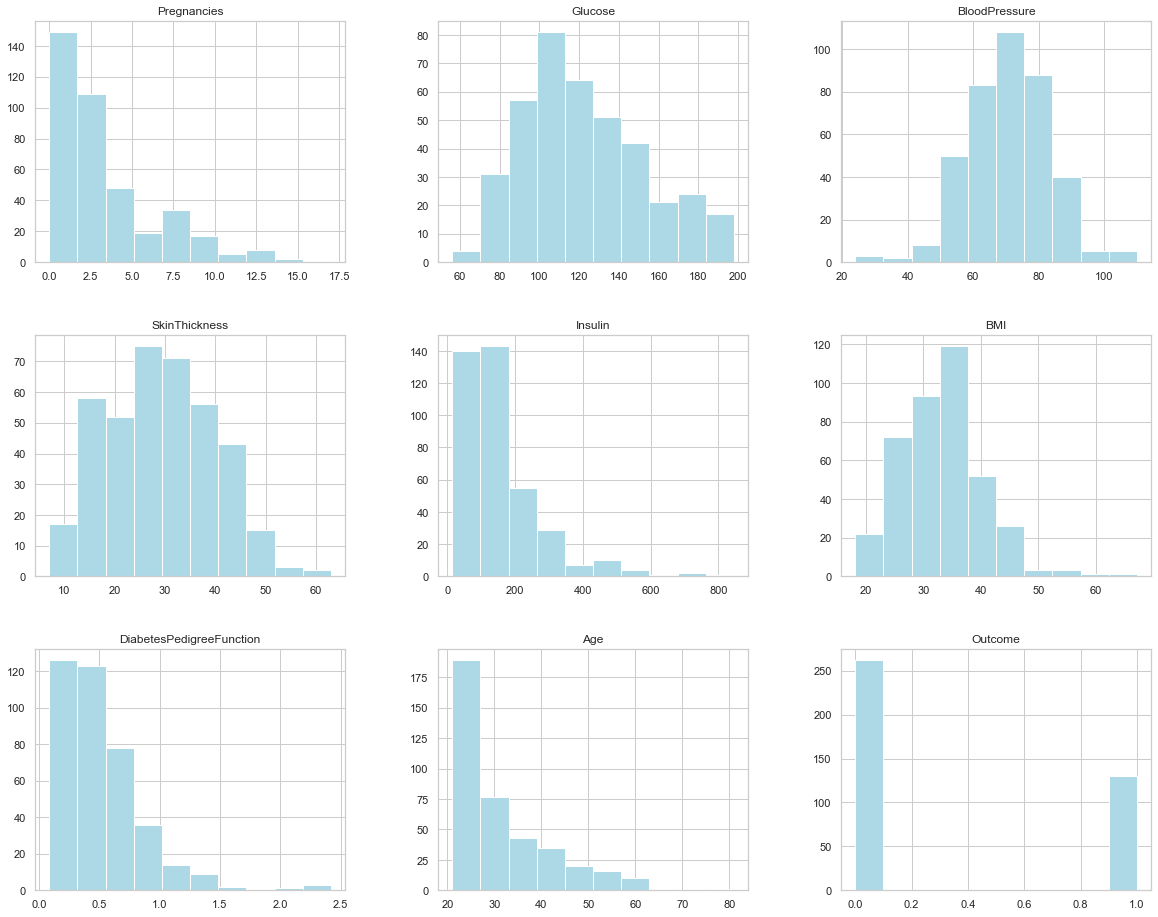

In [210]:
N1Diab.hist(figsize=(20, 16),color='lightblue')

+ El histograma de la frecuencia absoluta de la variable *Pregnacies*, muestra que la mayoria de mujeres mayor a 21 años en el pueblo Pima en 1990 tiene 1 o 2 hijos.
+ El histograma de la variable *Glucose*, muestra que el intervalo de clase de con mayor frecuencia absoluta de mujeres mayor de 21 años en el pueblo Pima en 1990 tiene 100-120  mg/dl en la concentración de glucosa en plasma a 2 horas.
+ El histograma de la variable *BloodPressure* , muestra que el intervalo de clase con mayor frecuencia absoluta de mujeres mayor de 21 años en el pueblo Pima en 1990 tiene una presión arterial diastólica de 70-80 mmHg.
+ El histograma de la variable *SkinThickness* , muestra que el intervalo con mayor frecuencia absoluta de mujeres mayor de 21 años en el pueblo Pima en 1990 tiene un grosor del pliegue de la piel de 25-30 mmHg.
+ El histograma de la variable *Insulin* , muestra que los intervalos de mayor frecuencia absoluta de mujeres mayor de 21 años en el pueblo Pima en 1990 tienen un nivel de insulina sérica 100-200µU/mL
+ El histograma de la variable *BMI* , muestra que el intervalo de mayor frecuencia absoluta de mujeres mayor de 21 años en el pueblo Pima en 1990 tiene un índice de masa corporal entre 30-40  kg/m².
+ El histograma de la variable *DiabetesPedigreeFunction* , muestra que los intervalos de mayor frecuencia absoluta de mujeres mayor de 21 años en el pueblo Pima en 1990 tiene una función de pedigrí que oscila entre 0.08-0.5.
+ El histograma de la variable *DiabetesPedigreeFunction* , muestra que el intervalo de mayor frecuencia absoluta de mujeres mayor de 21 años en el pueblo Pima en 1990 tiene una función de pedigrí que oscila entre 0.08-0.5.
+ El histograma de la variable *Age* , muestra que el intervalo de mayor frecuencia absoluta de mujeres originarias del pueblo Pima  mayores a 21 años en 1990 oscila entre 21-30 años


+ **Mapa de calor**

Uno de nuestros objetivos secundarios es establacer que tan correlacionadas están ciertas variables, así como lograr responder a la pregunta ¿Qué variables, que representan un factor de riesgo para la diabetes están altamente correlacionadas?, por lo que usaremos un mapa de calor para poder visualizar de manera más sencilla la correlación entre dos variables.

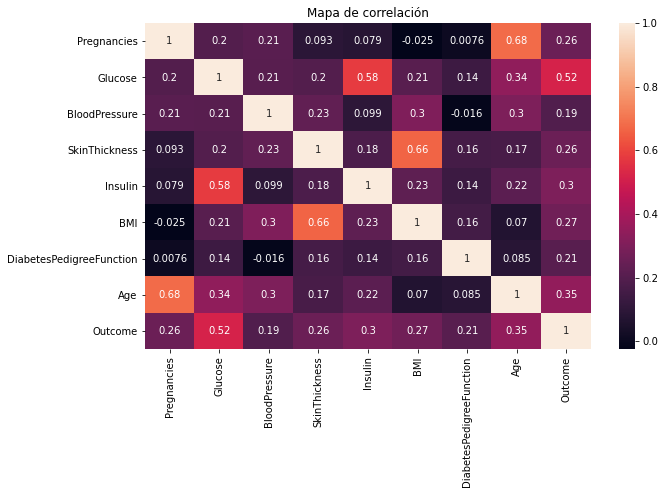

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(N1Diab.corr(),annot=True)
plt.title('Mapa de correlación')
plt.savefig('graph.png')
plt.show()

El mapa de calor muestra que los niveles de glucosa, la edad y la insulina tienen una correlación significativa con la variable de resultado(Outcome), por lo que inferimos que estás variables son relevantes para construir nuestro modelo.

En adición, también podemos concluir que la correlación entre pares de características, como la edad y los embarazos, o la insulina y la Glucosa, así como el grosor del pliegue de la piel y el índice de masa corporal muestran una correlación significativa.

+ **Gráfico de pastel**

Dado que una de nuestras preguntas de interés es determinar si la diabetes predomina en el grupo del pueblo Pima, procederemos a visualizar mediante un gráfico de pastel la distribución de personas diabéticas.

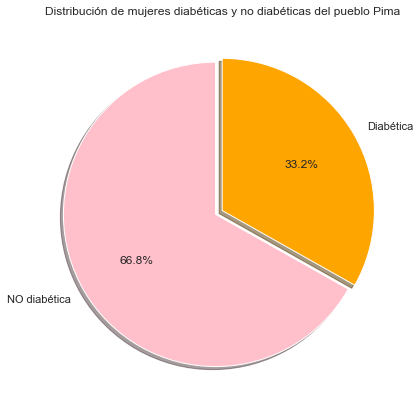

In [148]:
sns.set(style="whitegrid")
labels = ['NO diabética', 'Diabética']
sizes = N1Diab['Outcome'].value_counts(sort = True)
explode = (0.05,0) 
 
plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=["pink","orange"], autopct='%1.1f%%', shadow=True, startangle=90,)

plt.title('Distribución de mujeres diabéticas y no diabéticas del pueblo Pima')
plt.show()


+ La gráfica nos muestra que el 66.8% de las mujeres mayores a 21 años, en el pueblo Pima NO tiene diabetes, en cambio el 33.2% si padece diabetes, esto para el año de 1990.
+ La gráfica de pastel confirma el valor de la prevalencia obtenida previamente.
+ Como se menciono previamente, este porcentaje de mujeres mayores a 21 años es bastante alto comparandolo a nivel mundial en donde unicamente es el 8.5%, por lo que concluimos que las mujeres del Pueblo Pima, tienden a padecer diabetes. 

+ **Pairplot**

Usando el mapa de calor, nos percatamos que el nivel de glucosa, la edad y la insulina tienen una correlación significativa con la variable de resultado(Outcome), por lo que procederemos a visualizar dichas variables en un scatter plot, para ver el grado de correlación de una manera gráfica. 

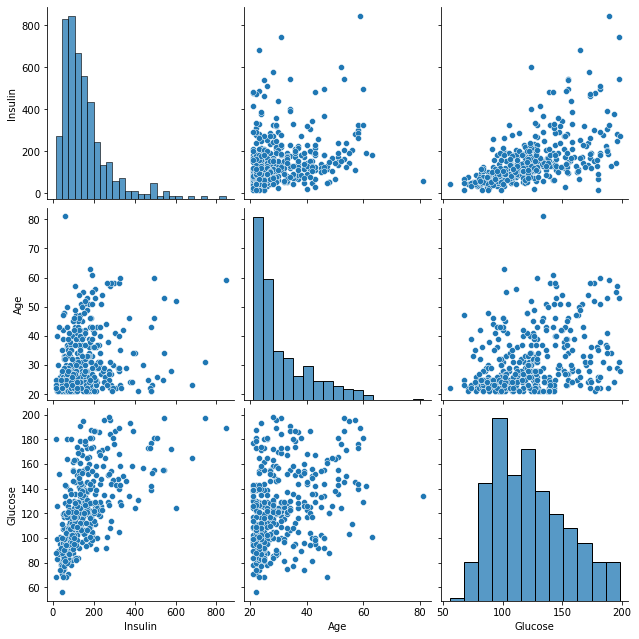

In [51]:
sns.pairplot(data=N1Diab[['Insulin' ,'Age','Glucose']], height=3)

+ Podemos visualizar que la variable Glucose está significativamente correlacionada con la variable Insulin, y con una correlación baja con la variable edad.

+ Por otro lado, la edad, está pobrementa relacionada con la variable Glucosa e insulina.

+ El nivel de insulina sérica, denotado por la variable Insulin tiene una correlación significativa con la variable Glucose y una correlación baja con la variable edad.

+ **Jointplot**

Uno de nuestros objetivos es visualizar la distribución de los datos, por lo que usaremos este tipo de gráfico para poder visualizar en qué puntos se concentra la información.
    En este caso, sólo visualizaremos la Glucosa con la insulina, y la Glucosa con la edad ya que son las variables que se ven más altamente correlacionadas con la variable resultado.

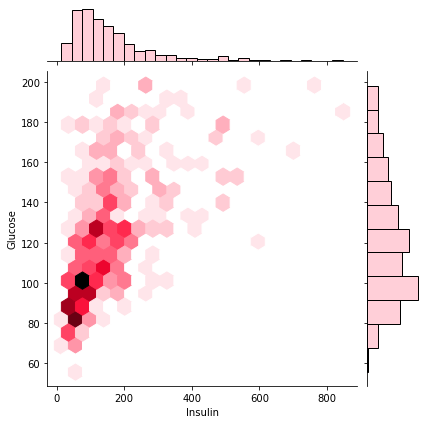

In [52]:
sns.jointplot(x='Insulin', y='Glucose', data=N1Diab, kind='hex', 
              gridsize=20, color='pink')

Podemos observar la concentración de los datos de la variable *Glucose* e *Insulin*, la cual muestra un cluster en 100 mg/dL en el nivel de Glucosa y aproximadamente 100µU/mL en el nivel de insulina sérica de 2 horas.

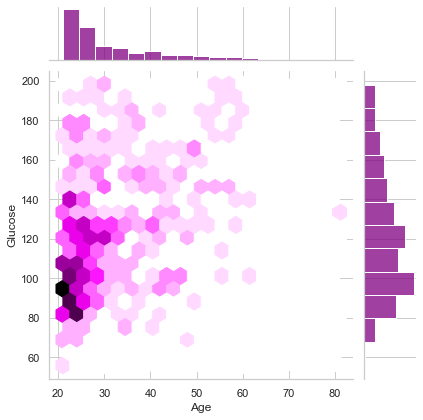

In [222]:
sns.jointplot(x='Age', y='Glucose', data=N1Diab, kind='hex', 
              gridsize=20, color='purple')

Podemos observar la concentración de los datos de la variable *Glucose* y *Age*, la cual muestra un cluster aproximadamente en 98 mg/dL en el nivel de Glucosa, esto a los 21 años.

## Modelo de diagnóstico de diabetes utilizando un árbol de clasificación.

In [ ]:
### Instalar librería graphviz

In [1]:
conda install python-graphviz.

SyntaxError: invalid syntax (<ipython-input-1-3e1bd5ab5d3f>, line 2)

In [2]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [40]:
pip install mpld3

  Created wheel for mpld3: filename=mpld3-0.5.2-py3-none-any.whl size=200623 sha256=0e41af2f6d14bee05cf0d14d679b1747c607935d4c78d3ee9ca53465f5806e87
  Stored in directory: c:\users\cruz_\appdata\local\pip\cache\wheels\d1\fb\75\f5b4dc0a7eb149b7ca745beeced5a286e4e8ab3a8cdb45bd1b
Successfully built mpld3
Note: you may need to restart the kernel to use updated packages.


In [15]:
%matplotlib notebook
import mpld3
mpld3.enable_notebook()

In [2]:
### Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize': [3, 3]}, font_scale=1.2)

In [3]:
N1Diab=pd.read_csv("6 variables.csv")

In [4]:
N1Diab

,Glucose,Insulin,Age,Outcome
0,89,94,21,0
1,137,168,33,1
2,78,88,26,1
3,197,543,53,1
4,189,846,59,1
...,...,...,...,...
387,181,510,26,1
388,128,110,37,1
389,88,16,22,0
390,101,180,63,0


In [5]:
### Arreglando base de datos
N1Diab.columns = ['Glucose','Insulin', 'Age', 'Outcome']
N1Diab.columns

Index(['Glucose', 'Insulin', 'Age', 'Outcome'], dtype='object')

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
le = LabelEncoder()

In [8]:
N1Diab.Outcome = le.fit_transform(N1Diab.Outcome)

In [9]:
### Arbol de clasificación
X = N1Diab.iloc[:,0:3].values
y = N1Diab['Outcome'].values

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

In [11]:
#Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
arbol = DecisionTreeClassifier(class_weight=None, criterion = 'entropy', max_depth = 4, random_state = 0)
arbol.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

In [12]:
clf = arbol.fit(X_train, Y_train)

[Text(80.06086956521739, 146.77200000000002, 'X[0] <= 127.5\nentropy = 0.915\nsamples = 294\nvalue = [197, 97]'),
 Text(40.030434782608694, 114.156, 'X[2] <= 25.5\nentropy = 0.561\nsamples = 175\nvalue = [152, 23]'),
 Text(14.556521739130435, 81.54000000000002, 'X[0] <= 94.5\nentropy = 0.271\nsamples = 86\nvalue = [82, 4]'),
 Text(7.278260869565218, 48.92400000000001, 'entropy = 0.0\nsamples = 35\nvalue = [35, 0]'),
 Text(21.834782608695654, 48.92400000000001, 'X[1] <= 67.5\nentropy = 0.397\nsamples = 51\nvalue = [47, 4]'),
 Text(14.556521739130435, 16.30800000000002, 'entropy = 0.881\nsamples = 10\nvalue = [7, 3]'),
 Text(29.11304347826087, 16.30800000000002, 'entropy = 0.165\nsamples = 41\nvalue = [40, 1]'),
 Text(65.50434782608696, 81.54000000000002, 'X[1] <= 87.5\nentropy = 0.748\nsamples = 89\nvalue = [70, 19]'),
 Text(50.947826086956525, 48.92400000000001, 'X[0] <= 80.5\nentropy = 0.187\nsamples = 35\nvalue = [34, 1]'),
 Text(43.66956521739131, 16.30800000000002, 'entropy = 0.722

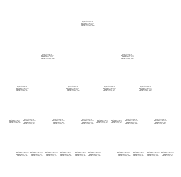

In [13]:
tree.plot_tree(clf) 

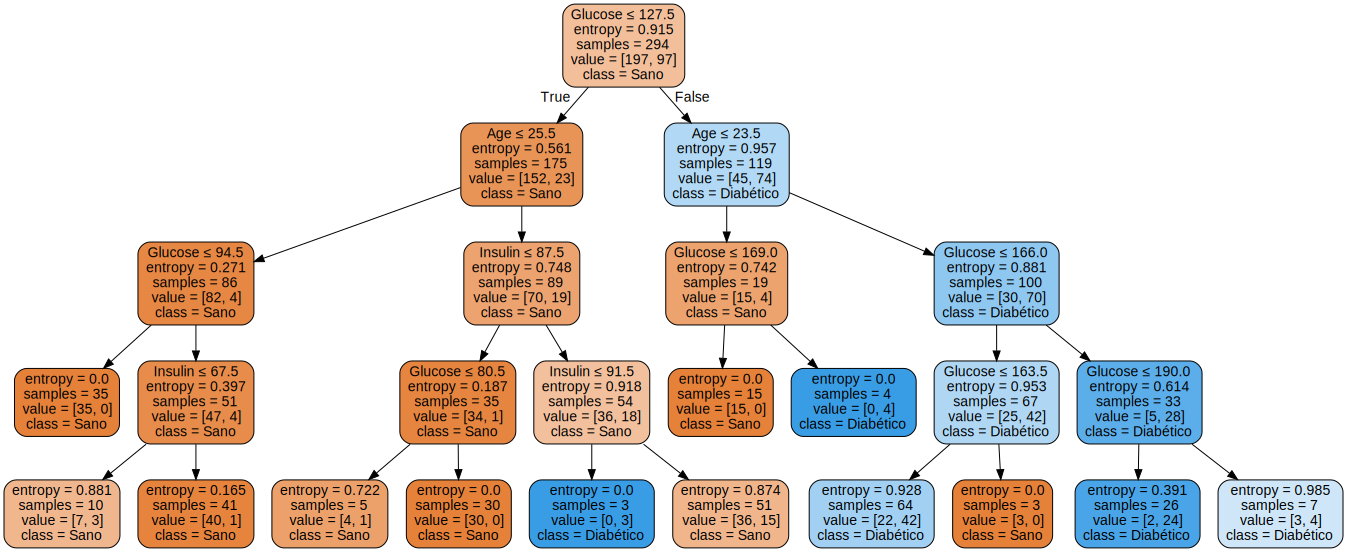

In [16]:
dot_data = tree.export_graphviz(clf, 
                                out_file = None,
                                class_names = ['Sano', 'Diabético'],
                                feature_names = list(N1Diab.drop(['Outcome'], axis=1)),
                                filled= True,
                                rounded=True, 
                                special_characters=True,
                               )
graph = graphviz.Source(dot_data)
graph 

____

In [30]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
# Librerias para curva ROC.
from sklearn.datasets import make_classification  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.model_selection import train_test_split  
from sklearn.metrics import roc_curve  
from sklearn.metrics import roc_auc_score  

In [31]:
def plot_roc_curve(fpr, tpr):  
    plt.plot(fpr, tpr, color='darkorange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('Tasa positiva falsa')
    plt.ylabel('Tasa positiva verdadera')
    plt.title('Curva ROC')
    plt.legend()
    plt.show()

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

In [33]:
model = DecisionTreeClassifier()  
model.fit(X_train, Y_train)  

DecisionTreeClassifier()

In [34]:
probs = model.predict_proba(X_test) 

In [35]:
probs = probs[:, 1]  

In [36]:
auc = roc_auc_score(Y_test, probs)  
print('AUC: %.2f' % auc)  

AUC: 0.75


> **El valor ideal de un AUC es 1, es este caso obtuvimos 0.76 lo que nos indica que nuestro modelo es 76% exacto para su clasificación, por lo que concluimos que la exactitud del modelo no es óptima.** 

In [37]:
fpr, tpr, thresholds = roc_curve(Y_test, probs)  

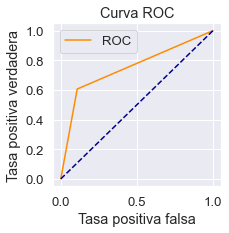

In [38]:
plot_roc_curve(fpr, tpr)  

> **La curva ROC muestra que es un modelo regular, es decir aún podriamos mejorar la exactitud de dicho modelo**

# Conclusión.
## General

![image](https://img.icons8.com/bubbles/2x/goal.png)
### Objetivo principal.
El objetivo principal no se ha cumplido, sin embargo con las herramientas de visualización de datos, nos percatamos que lo idóneo es contemplar únicamente las variables de los niveles de glucosa, la edad y la insulina, esto basádonos en el mapa de calor y en el valor obtenido de correlación, ya que en las variables restantes no se tiene una correlación significativa con la variable *Outcome* la cual indica si el paciente es diabético o no.
    En adición, la técnica de míneria que ve más viable para cumplir nuestro objetivo es la técnica de **clasificación**.
    
### Objetivos secundarios.
+ **Visualizar la distribución de los datos:** 
Consideramos que este objetivo fue logrado,pues  utilizamos diversos tipos de gráficos como histogramas, gráfico de pastel y joinplot, en donde pudimos visualizar hechos importantes para el proyecto como la frecuencia absoluta, la cual nos podría ayudar a concluir y fundamentar preguntas de interés.

+ **Establecer qué tan correlacionadas están ciertas variables** 
Este objetivo fue cumplido, ya que utilizamos herramientas que nos brinda Phyton como la función .corr() y mapas de calor, en donde nos pudimos percatar que los niveles de glucosa, la edad y la insulina tienen una correlación significativa con la variable de resultado, por lo que concluimos que estas variables influyen sustancialmente en si una persona tiene diabetes o no.

En adición, también podemos concluir que la correlación entre pares de características, como la edad y los embarazos, o la insulina y la Glucosa, así como el grosor del pliegue de la piel y el índice de masa corporal muestran una correlación significativa.

+ **Graficar los resultados obtenidos, para tener un panorama sobre si el modelo es bueno.**
Dado que aún no hemos construido el modelo, no tenemos herramientas para poder graficar, sin embargo, visualizamos que este objetivo será cumplido cuando utilicemos métricas de evaluación como la curva ROC, la cual nos dará el rendimiento del modelo de clasificación.

+ **Entender si existe una razón médica para tener el valor de 0 en las columnas que lo presenten.**
Previamente en el desarrollo del avance abordamos detalladamente porque no tenía sentido contemplar a valores iguales a 0, en variables como el nivel de insulina sérica(*Insuline), glucosa(*Glucose*), presión arterial diastólica(*BloodPressure*) y grosor del pliegue de la piel(*SkinThickness*). Además que recurrimos a fuentes de información en donde nos percatamos que en un estudio realizado en 2001, se demostró que 376 de 786 observaciones en el conjunto de datos de Pima Indians Diabetes database carecían de validez experimental, el valor de ceros se registró en lugar de observaciones experimentales faltantes. También se demostró que si se eliminaban    los valores con cero, los resultados podría mejorar drásticamente.

> Leslie J. Baier, Robert L. Hanson. *Genetic Studies of the Etiology of Type 2 Diabetes in Pima Indians* (2001) recuperado en https://diabetes.diabetesjournals.org/content/53/5/1181


+ En cuanto a las **preguntas de interés**, podemos contestar sólo   la primera y la segunda pregunta, esto por la etapa de desarrollo del proyecto, en donde nos encontramos.

***¿Podríamos afirmar que la diabetes predomina en el grupo del pueblo Pima?***
Sí, dadas las herramientas que proporciona la estadística descriptiva como lo son las medidas de tendencia central, como la media, en donde nos percatamos que comparando factores de riesgo en torno a la diabetes, nos dimos cuenta que las mujeres mayores a 21 años en el pueblo Pima, tienen un alto riesgo de desarrollar diabetes, esto porque un nivel de Glucosa entre 100 y 125 mg/dL se considera prediabetes,y la media del nivel de glucosa de las mujeres mayores a 21 años en el pueblo Pima es de 122.61 mg/dl. 
 En adición, a través de funciones de Phyton determinamos la prevalencia de la diabetes en las mujeres del pueblo Pima, y nos percatamos que comparandolo con la prevalencia de diabetes en el mundo, la cual es del 8.5%, mientras que en el 1990 en el pueblo Pima es de 33.16%, por lo cual concluimos que la diabetes predomina en el pueblo Pima en comparación a nivel mundial.
 
Es importante destacar, que consultamos fuentes de información para saber los factores del riesgo de la diabetes y nos dimos cuenta que tener antecedentes nativos americanos aumenta significativamente el riesgo.
Por lo tanto, concluimos que efectivamente la diabetes prevalece en el pueblo Pima, lo cual es una situación alarmante en la salud del pueblo Pima, y las  herramientas de visualización de datos, así como de estadística básica, nos proveyó sustento para tener un panorama de la situación entorno a la diabetes.

***¿Qué variables, que representan un factor de riesgo para la diabetes están altamente correlacionadas?***


Usando el mapa de calor y la función .corr(), nos percatamos que **el nivel de glucosa, la edad y la insulina** tienen una correlación significativa con la variable de resultado(Outcome), por lo que inferimos que estás variables representan un factor de riesgo para la diabetes.
Partiendo del hecho mencionado anteriormente tenemos los siguientes resultados:

+ La variable **Glucose** está altamente correlacionada con la variable *Insulin* con 0.58, así mismo con la variable de *Outcome* en un 0.52 y con la variable *Age* en un 0.34.

+ La **edad**, está correlacionada altamente con el número de embarazos *pregnancies* en un 0.68, y con la variable *Outcome* con un 0.35.

+ El nivel de insulina sérica, denotado por la variable **Insulin** tiene una correlación significativa con la variable *Glucose* en 0.58, además que posee una correlación con la variable *Outcome* en un 0.35.